### Активаційна функція

Біологічний нейрон імітується у ШНМ через активаційну функцію. У задачах
класифікації (наприклад визначення спам-повідомлень) активаційна функція
повинна мати характеристику "вмикача". Іншими словами, якщо вхід більше,
ніж деяке значення, то вихід повинен змінювати стан, наприклад з 0 на 1 або
-1 на 1. Це імітує "включення" біологічного нейрону. У якості активаційної
функції зазвичай використовують сигмоїдну функцію:

$$ f(z) = 1 / ( 1 + exp(-z) ) $$

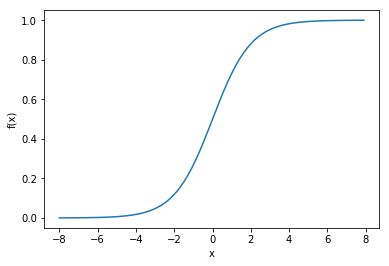

In [4]:
import matplotlib.pylab as plt
import numpy as np

x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

З графіку можна побачити, що функція "активаційна" – вона росте з 0 до 1 з
кожним збільшенням значення . Сигмоїдна функція є гладкою і
неперервною. Це означає, що функція має похідну, що у свою чергу є дуже
важливим фактором для навчання алгоритму.

### Вузли

Кожен вузол приймає зважений вхід, активує активаційну функцію для суми входів, та генерує вихід.
Зважений вхід у вузол має вигляд:

$$ x1*w1 + x2*w2 + x3*w3 + b $$

Приклад:

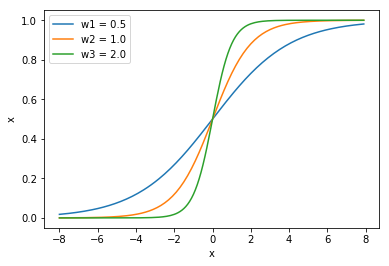

In [5]:
w1 = 0.5
w2 = 1.0
w3 = 2.0

l1 = 'w1 = 0.5'
l2 = 'w2 = 1.0'
l3 = 'w3 = 2.0'

for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)

plt.xlabel('x')
plt.ylabel('x')
plt.legend(loc=2)
plt.show()

Тут ми можемо бачити, що при зміні ваги змінюється також рівень нахилу
графіка активаційної функції. Це корисно, якщо ми моделюємо різні
щільності взаємозв'язків між входами та виходами. Але що робити, якщо ми
хочемо, щоб вихід змінювався тільки при більше 1? Для цього нам потрібне
зміщення. Розглянемо таку мережу із зміщенням на вході:

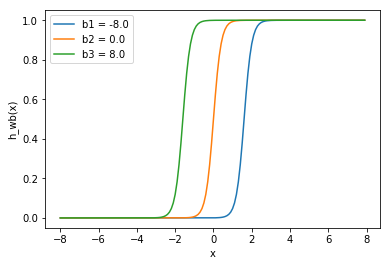

In [6]:
w = 5.0

b1 = -8.0
b2 = 0.0
b3 = 8.0

l1 = 'b1 = -8.0'
l2 = 'b2 = 0.0'
l3 = 'b3 = 8.0'

for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)

plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.show()

З графіку можна побачити, що змінюючи "вагу" зміщення , ми можемо
змінювати час запуску вузла. Зміщення дуже важливе у випадках, коли
потрібно імітувати умовні відносини.

### Процес прямого поширення

Щоб продемонструвати, як знаходити вихід, маючи вже відомий вхід, у
нейронних мережах, почнемо з попереднього прикладу з трьома шарами.
Нижче така система представлена у вигляді системи рівнянь:

$$ h1(2) = f(w11(1)*x1 + w12(1)*x2 + w13(1)*x3 + b1(1)) $$
$$ h2(2) = f(w21(1)*x1 + w22(1)*x2 + w23(1)*x3 + b2(1)) $$
$$ h3(2) = f(w31(1)*x1 + w32(1)*x2 + w33(1)*x3 + b3(1)) $$

$$ hW,b(x) = h1(3) = f(w11(2)*h1(2) + w12(2)*h2(2) + w13(2)*h3(2) + b1(2)) $$

де f- активаційна функція вузла, у нашому випадку сигмоїдна функція.
У першому рядку h1(2)- вихід першого вузла у другому шарі, його входами відповідно є w11(1)*x1, w12(1)*x2, w13(1)*x3 та b1(1). 

Останній рядок розраховує вихід єдиного вузла в останньому третьому шарі, він є кінцевою вихідною точкою в нейронній мережі. У ньому замість зважених вхідних змінних беруться зважені виходи вузлів з другого шару та зміщення. Така система рівнянь також добре показує
ієрархічну структуру нейронної мережі.

### Приклад прямого поширення

In [7]:
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])

Ми просто присвоїли деякі рандомні числові значення вазі кожного зв'язку з Ш1. Аналогічно можна зробити і з Ш2: W(2) = (w11(2)  w12(2)  w13(2))

In [8]:
w2 = np.zeros((1,3))
w2[0,:] = np.array([0.5, 0.5, 0.5])
w2

array([[ 0.5,  0.5,  0.5]])

Ми також можемо присвоїти деякі значення вазі зміщення у Ш1 та Ш2:

In [9]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

Нарешті, перед написанням основної програми для розрахунку виходу
нейронної мережі, напишемо окрему функцію для активаційної функції:

In [10]:
def f(x):
    return 1 / (1 + np.exp(-x))

f(1)

0.7310585786300049

#### Перша спроба реалізувати процес прямого поширення

In [11]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        # формується вхідний масив - перемноження ваг у кожному шарі
        # якщо перший шар, то вхідний масив дорівнює вектору х
        # якщо шар не перший, вхід для поточного шару дорівнює
        # виходу попереднього
        #h = np.zeros((w[l].shape[0],))
        if l == 0:
            node_in = x
        else:
            #h = np.zeros((w[l].shape[0],))
            node_in = h
        # формуємо вихідний масив для вузлів у шарі l + l
        h = np.zeros((w[l].shape[0],))
        # проходить по рядкам масиву ваг
        for i in range(w[l].shape[0]):
            # рахує суму всередині активаційної функції
            f_sum = 0
            # проходить по стовбцям масиву ваг
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            # додає зміщення
            f_sum += b[l][i]
            # використовує активаційну функцію для розрахунку
            # і-того виходуб у даному випадку h1, h2, h3
            h[i] = f(f_sum)
    return h

Дана функція приймає у якості входу номер шару у нейронній мережі, х -
вхідний масив/вектор:

In [12]:
w = [w1, w2]
b = [b1, b2]
# рандомізований вхідний вектор х
x = [1.5, 2.0, 3.0]

Функція спочатку перевіряє, чим є вхідний масив для відповідного шару з
вузлами/вагами. Якщо розглядається перший шар, то входом для другого
шару є вхідний масив , помножений на відповідні ваги. Якщо шар не
перший, то входом для наступного буде вихід попереднього.
Виклик функції:

In [13]:
simple_looped_nn_calc(3, x, w, b)

array([ 0.83545566])

#### Більш ефективна імплементація

Використання циклів – не найефективніший способом розрахунку прямого
поширення мовою Пайтон, тому що цикли у цій мові програмування
працюють досить повільно. Ми коротко розглянемо кращі рішення. Також
можна буде порівняти роботу алгоритмів, використавши функцію у IPython:

In [15]:
%timeit simple_looped_nn_calc(3, x, w, b)

63.5 µs ± 9.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


У даному випадку процес прямого поширення з циклами займає близько 40
мікросекунд. Це досить швидко, але не для великих нейронних мереж з >100
вузлами на кожному шарі, особливо при їх навчанні. Якщо ми запустимо цей
алгоритм на нейронній мережі з чотирма шарами, то отримаємо результат 70
мікросекунд. Ця різниця є досить значною.

### Векторизація у нейронних мережах

Можна більш компактно написати попередні рівняння, тим самим знайти
результат ефективніше.

In [17]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

In [20]:
matrix_feed_forward_calc(3, x, w, b)

array([ 0.83545566])

Зверніть увагу на рядок 7, на якому відбувається перемноження матриці на
вектор. Якщо ви використаєте замість функції перемноження a.dot(b) символ
*, то вийде щось схоже на поелементне множення замість справжнього
добутку матриць.
Якщо порівняти час роботи цієї функції з попередньою на простій мережі з
чотирма шарами, то ми отримаємо результат лише на 24 мікросекунди
менший. Але якщо збільшити кількість вузлів у кожному шарі до 100-100-50-
10, то ми отримаємо значно більшу різницю. Функція з циклами у цьому
випадку дає результат 41 мілісекунди, коли у функції з векторизацією це
займає лише 84 мікросекунди. Також існують ще ефективніші імплементації
операцій над матрицями, які використовують пакети глибинного навчання,
такі як TensorFlow та Theano.
На цьому все про процес прямого поширення у нейронних мережах. У
наступних розділах ми поговоримо про способи навчання нейронних мереж,
використовуючи градієнтний спуск та зворотне поширення.